<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_groupwise_(y_hat)_0_3_0_7_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.3_0.7'

In [4]:
os.listdir(base_path)

['data_groupwise_0.3_0.7_n20.csv',
 'data_groupwise_0.3_0.7_n30.csv',
 'data_groupwise_0.3_0.7_n60.csv',
 'data_groupwise_0.3_0.7_n120.csv',
 'data_groupwise_0.3_0.7_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.622808,60.008864,22.248108,38.497661,0.188110,166.565550,166.455747,0.109803
1,0.0,1.0,83.677606,36.668506,84.197489,24.397574,-0.027921,238.913255,239.043259,-0.130005
2,0.0,2.0,85.151098,82.864611,99.509399,43.273044,0.564851,321.363003,320.895466,0.467537
3,0.0,3.0,23.533980,78.042382,46.921980,74.565568,-0.470046,232.593863,233.204429,-0.610566
4,0.0,4.0,92.959735,78.939152,56.679023,82.483451,-0.607253,320.454107,320.961707,-0.507600
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.500652,78.165318,32.459839,71.089219,1.716172,242.931199,241.072736,1.858463
249996,999.0,246.0,21.669626,66.636909,70.999939,53.079431,0.218333,222.604239,222.260094,0.344144
249997,999.0,247.0,82.487086,74.975542,31.648297,61.072746,-0.570674,259.612996,260.188507,-0.575511
249998,999.0,248.0,85.643837,82.471086,73.535885,95.884166,1.290910,348.825884,347.504420,1.321464


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.622808,60.008864,22.248108,38.497661,0.188110,166.565550,166.455747,0.109803
1,0.0,1.0,83.677606,36.668506,84.197489,24.397574,-0.027921,238.913255,239.043259,-0.130005
2,0.0,2.0,85.151098,82.864611,99.509399,43.273044,0.564851,321.363003,320.895466,0.467537
3,0.0,3.0,23.533980,78.042382,46.921980,74.565568,-0.470046,232.593863,233.204429,-0.610566
4,0.0,4.0,92.959735,78.939152,56.679023,82.483451,-0.607253,320.454107,320.961707,-0.507600
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.500652,78.165318,32.459839,71.089219,1.716172,242.931199,241.072736,1.858463
249996,999.0,246.0,21.669626,66.636909,70.999939,53.079431,0.218333,222.604239,222.260094,0.344144
249997,999.0,247.0,82.487086,74.975542,31.648297,61.072746,-0.570674,259.612996,260.188507,-0.575511
249998,999.0,248.0,85.643837,82.471086,73.535885,95.884166,1.290910,348.825884,347.504420,1.321464


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.622808  60.008864  22.248108  38.497661  0.188110  166.565550   
      1.0    83.677606  36.668506  84.197489  24.397574 -0.027921  238.913255   
      2.0    85.151098  82.864611  99.509399  43.273044  0.564851  321.363003   
      3.0    23.533980  78.042382  46.921980  74.565568 -0.470046  232.593863   
      4.0    92.959735  78.939152  56.679023  82.483451 -0.607253  320.454107   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  49.500652  78.165318  32.459839  71.089219  1.716172  242.931199   
      246.0  21.669626  66.636909  70.999939  53.079431  0.218333  222.604239   
      247.0  82.487086  74.975542  31.648297  61.072746 -0.570674  259.612996   
      248.0  85.643837  82.471086  73.535885  95.884166  1.290910  348.825884   
      249.0  60.274279  73.483592  66.892278  96.972260 -0.098831  307.523578   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    166.455747  0.109803  
      1.0    239.043259 -0.130005  
      2.0    320.895466  0.467537  
      3.0    233.204429 -0.610566  
      4.0    320.961707 -0.507600  
...                 ...       ...  
999.0 245.0  241.072736  1.858463  
      246.0  222.260094  0.344144  
      247.0  260.188507 -0.575511  
      248.0  347.504420  1.321464  
      249.0  307.514260  0.009318  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.622808  60.008864  22.248108  38.497661  0.188110  166.565550   
      1.0    83.677606  36.668506  84.197489  24.397574 -0.027921  238.913255   
      2.0    85.151098  82.864611  99.509399  43.273044  0.564851  321.363003   
      3.0    23.533980  78.042382  46.921980  74.565568 -0.470046  232.593863   
      4.0    92.959735  78.939152  56.679023  82.483451 -0.607253  320.454107   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  49.500652  78.165318  32.459839  71.089219  1.716172  242.931199   
      246.0  21.669626  66.636909  70.999939  53.079431  0.218333  222.604239   
      247.0  82.487086  74.975542  31.648297  61.072746 -0.570674  259.612996   
      248.0  85.643837  82.471086  73.535885  95.884166  1.290910  348.825884   
      249.0  60.274279  73.483592  66.892278  96.972260 -0.098831  307.523578   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    166.455747  0.109803  
      1.0    239.043259 -0.130005  
      2.0    320.895466  0.467537  
      3.0    233.204429 -0.610566  
      4.0    320.961707 -0.507600  
...                 ...       ...  
999.0 245.0  241.072736  1.858463  
      246.0  222.260094  0.344144  
      247.0  260.188507 -0.575511  
      248.0  347.504420  1.321464  
      249.0  307.514260  0.009318  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,35.622808,60.008864,22.248108,38.497661,0.188110,166.565550,166.455747,0.109803
1,0.0,1.0,83.677606,36.668506,84.197489,24.397574,-0.027921,238.913255,239.043259,-0.130005
2,0.0,2.0,85.151098,82.864611,99.509399,43.273044,0.564851,321.363003,320.895466,0.467537
3,0.0,3.0,23.533980,78.042382,46.921980,74.565568,-0.470046,232.593863,233.204429,-0.610566
4,0.0,4.0,92.959735,78.939152,56.679023,82.483451,-0.607253,320.454107,320.961707,-0.507600
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.500652,78.165318,32.459839,71.089219,1.716172,242.931199,241.072736,1.858463
249996,999.0,246.0,21.669626,66.636909,70.999939,53.079431,0.218333,222.604239,222.260094,0.344144
249997,999.0,247.0,82.487086,74.975542,31.648297,61.072746,-0.570674,259.612996,260.188507,-0.575511
249998,999.0,248.0,85.643837,82.471086,73.535885,95.884166,1.290910,348.825884,347.504420,1.321464


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    35.622808  60.008864  22.248108  38.497661  0.188110  166.565550   
      1.0    83.677606  36.668506  84.197489  24.397574 -0.027921  238.913255   
      2.0    85.151098  82.864611  99.509399  43.273044  0.564851  321.363003   
      3.0    23.533980  78.042382  46.921980  74.565568 -0.470046  232.593863   
      4.0    92.959735  78.939152  56.679023  82.483451 -0.607253  320.454107   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  49.500652  78.165318  32.459839  71.089219  1.716172  242.931199   
      246.0  21.669626  66.636909  70.999939  53.079431  0.218333  222.604239   
      247.0  82.487086  74.975542  31.648297  61.072746 -0.570674  259.612996   
      248.0  85.643837  82.471086  73.535885  95.884166  1.290910  348.825884   
      249.0  60.274279  73.483592  66.892278  96.972260 -0.098831  307.523578   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    166.455747  0.109803  
      1.0    239.043259 -0.130005  
      2.0    320.895466  0.467537  
      3.0    233.204429 -0.610566  
      4.0    320.961707 -0.507600  
...                 ...       ...  
999.0 245.0  241.072736  1.858463  
      246.0  222.260094  0.344144  
      247.0  260.188507 -0.575511  
      248.0  347.504420  1.321464  
      249.0  307.514260  0.009318  

[250000 rows x 8 columns]

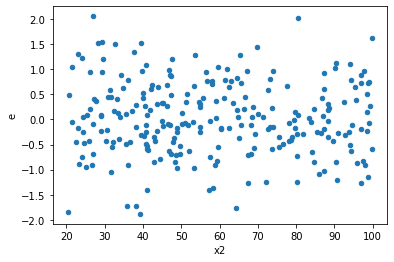

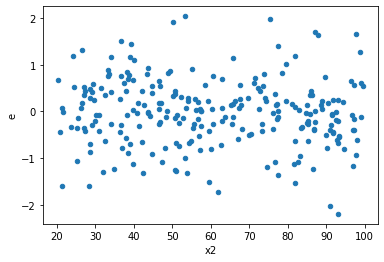

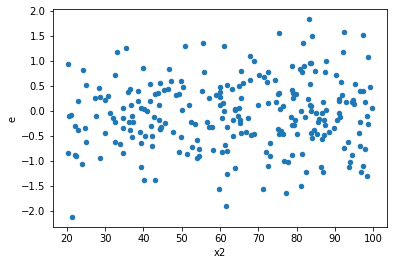

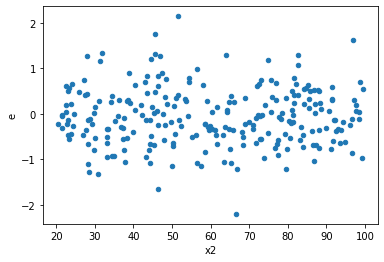

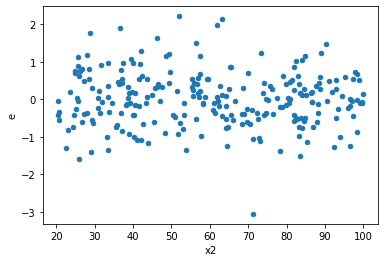

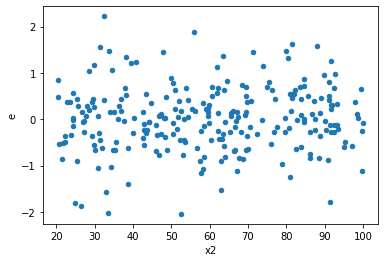

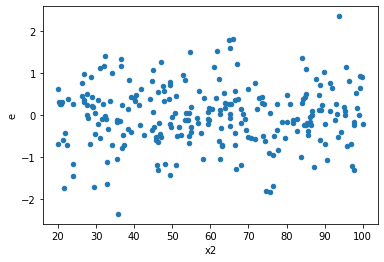

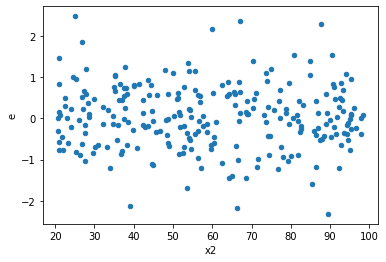

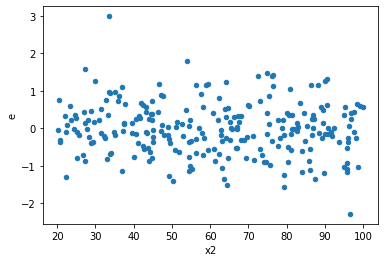

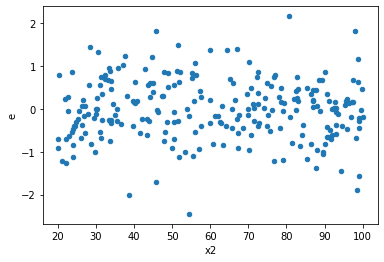

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,96.0,96.0,46.441498180928576,51.009710787428936,0.48376560605133934,0.5313511540357181,1.0983648845414793,0.6466968268551769,0.6766515865724115,0.32334841342758847,Reject005=1 : Homoscedasticity
2.0,96.0,96.0,40.43130006960634,55.601419998887316,0.421159375725066,0.5791814583217428,1.3752073246015877,0.12030072001608283,0.9398496399919586,0.060150360008041415,Reject005=1 : Homoscedasticity
5.0,96.0,96.0,53.038416794251575,54.66894919196379,0.5524835082734539,0.5694682207496228,1.0307424786836572,0.8823825975028763,0.5588087012485619,0.44119129875143814,Reject005=1 : Homoscedasticity
6.0,96.0,96.0,41.13087733918485,59.756874096333846,0.4284466389498422,0.6224674385034775,1.4528470570552174,0.06877686246457726,0.9656115687677114,0.03438843123228863,Reject005=1 : Homoscedasticity
7.0,96.0,96.0,33.504436511144505,46.66548613912468,0.34900454699108857,0.48609881394921545,1.3928151313215624,0.10625172352432077,0.9468741382378396,0.05312586176216039,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,35.3958100616214,50.788524389230645,0.36870635480855624,0.5290471290544859,1.4348739102399892,0.07848187072831814,0.9607590646358409,0.03924093536415907,Reject005=1 : Homoscedasticity
9.0,96.0,96.0,37.11275054893151,41.92366375286645,0.38659115155136986,0.43670483075902555,1.1296296591542567,0.551576698330658,0.724211650834671,0.275788349165329,Reject005=1 : Homoscedasticity
11.0,96.0,96.0,41.605191935675855,63.60805206037238,0.4333874159966235,0.662583875628879,1.5288489032502068,0.038772575431611944,0.980613712284194,0.019386287715805972,Reject005=0 : Heteroscedasticity
12.0,96.0,96.0,41.04304098948697,48.489877318471926,0.4275316769738226,0.5051028887340826,1.1814396825735316,0.41551259000528384,0.7922437049973581,0.20775629500264192,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,48.06472989759569,44.93436312215762,0.5006742697666218,0.46806628252247523,0.9348718533921345,0.7421279407127788,Reject005=1 : Homoscedasticity
1.0,96.0,96.0,46.441498180928576,51.009710787428936,0.48376560605133934,0.5313511540357181,1.0983648845414793,0.6466968268551769,Reject005=1 : Homoscedasticity
2.0,96.0,96.0,40.43130006960634,55.601419998887316,0.421159375725066,0.5791814583217428,1.3752073246015877,0.12030072001608283,Reject005=1 : Homoscedasticity
3.0,96.0,96.0,47.70988920234437,40.024442353949354,0.49697801252442053,0.41692127452030575,0.8389129177014024,0.3910522934505907,Reject005=1 : Homoscedasticity
4.0,96.0,96.0,43.36201726528565,42.094033590548506,0.45168767984672553,0.4384795165682136,0.9707581945051192,0.8847025864901863,Reject005=1 : Homoscedasticity
5.0,96.0,96.0,53.038416794251575,54.66894919196379,0.5524835082734539,0.5694682207496228,1.0307424786836572,0.8823825975028763,Reject005=1 : Homoscedasticity
6.0,96.0,96.0,41.13087733918485,59.756874096333846,0.4284466389498422,0.6224674385034775,1.4528470570552174,0.06877686246457726,Reject005=1 : Homoscedasticity
7.0,96.0,96.0,33.504436511144505,46.66548613912468,0.34900454699108857,0.48609881394921545,1.3928151313215624,0.10625172352432077,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,35.3958100616214,50.788524389230645,0.36870635480855624,0.5290471290544859,1.4348739102399892,0.07848187072831814,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      919
Reject005=0 : Heteroscedasticity     81
Name: Result_test, dtype: int64